In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines

#import graphlab as gl
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import time
import random
from matplotlib import rc, rcParams
from xgboost import plot_tree


In [2]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.fonttype'] = 42
mpl.font_manager.FontManager()
# make the numbers on axis bold
rc('font', weight='bold')

In [3]:
from xgboost import XGBRegressor

     MolWt  HeavyAtomCount  HeavyAtomMolWt  NumHAcceptors  NumHDonors  \
0  111.108               8         106.068              5           0   
1   74.127               5          64.047              2           2   
2   99.093               7          94.053              4           2   
3  102.097               7          96.049              3           3   
4   86.138               6          76.058              2           2   

   NumHeteroatoms  NumRotatableBonds  NumValenceElectrons  NumAromaticRings  \
0               5                  1                   42                 1   
1               2                  2                   32                 0   
2               4                  0                   38                 1   
3               5                  3                   40                 0   
4               2                  2                   36                 0   

   NumSaturatedRings  ...  NumAliphaticCarbocycles  NumAliphaticHeterocycles  \
0     

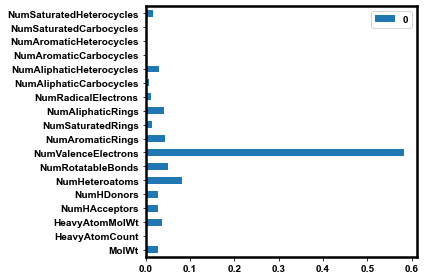

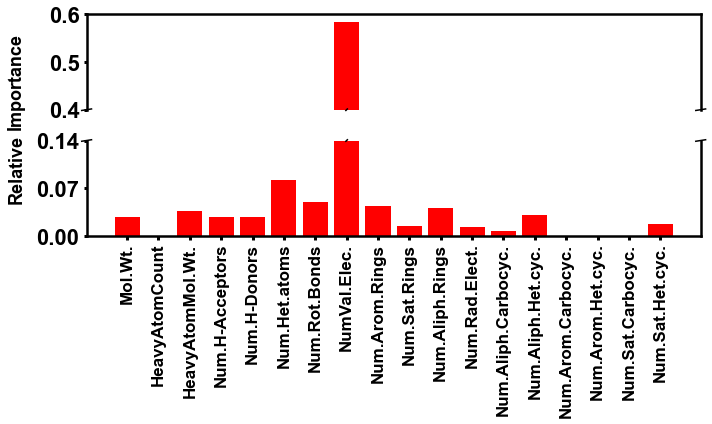

In [99]:
start = time.time()

# insert your file name here!!!
csv_filename = 'FeaturesRegular_validate_regressor.csv'
data = pd.read_csv(csv_filename)
"""
X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:,:-1].values,
    data.iloc[:,-1].values
)
"""
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Logp', 'QED', 'TPSA', 'heat_capacity'], axis=1),
    data.iloc[:,-1].values, random_state=6,
)

print (data.head())
"""
regr = RandomForestRegressor(bootstrap=True, max_samples = 1000, max_depth=2000, 
                             random_state=0,min_samples_split = 100, min_samples_leaf = 10,
                             max_features = 2, n_jobs = -1, verbose = 1) 
"""
max_depth = 100
start = time.time()
#max_depth = random.choice(max_depths)
"""
regr = RandomForestRegressor(n_jobs=-1, max_depth=max_depth, n_estimators=100,
                             random_state=0, verbose=1, warm_start=False)
"""


regr = XGBRegressor(max_depth=4, n_estimators=25, gamma=0.01, random_state=0, subsample=0.7)
regr.fit(X_train,y_train)
print (regr.get_params())
y_pred = regr.predict(X_test)
print ("feature_importances: ", regr.feature_importances_)
features = list(data.columns.values)

features.pop(-1)
features.pop(-1)
features.pop(-1)
print (features)

# qm9 file has one more column, should be removed
try:
    df = pd.DataFrame(regr.feature_importances_,features)
except:
    features.pop(-1)
    df = pd.DataFrame(regr.feature_importances_,features)
df.plot(kind='barh')
#plt.savefig('features{}.png'.format(csv_filename), dpi=700)
print (df)
print(y_pred)


features2 = ['Mol.Wt.', 'HeavyAtomCount', 'HeavyAtomMol.Wt.', 'Num.H-Acceptors', 
             'Num.H-Donors', 'Num.Het.atoms', 'Num.Rot.Bonds', 'NumVal.Elec.',  
             'Num.Arom.Rings', 'Num.Sat.Rings', 'Num.Aliph.Rings', 'Num.Rad.Elect.', 
             'Num.Aliph.Carbocyc.', 'Num.Aliph.Het.cyc.', 'Num.Arom.Carbocyc.', 
             'Num.Arom.Het.cyc.', 'Num.Sat.Carbocyc.', 'Num.Sat.Het.cyc.']

XX = pd.Series(regr.feature_importances_, index=features2)

print("here is your feature importances: index ", XX.index)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,
                               figsize=(10,6))

mpl.rcParams['axes.linewidth'] = 2.5
XX2 = np.around(XX.values, decimals=5)

ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x',which='both',bottom=False)
ax2.spines['top'].set_visible(False)

plt.rcParams["figure.autolayout"] = True

bs = 0.14
ts = 0.4

ax2.set_ylim(0,bs)
ax1.set_ylim(ts, 0.6)

bars1 = ax1.bar(XX.index, XX2, color='red')
plt.sca(ax1)
plt.yticks(rotation=0, fontsize=22)
plt.yticks(np.linspace(ts, 0.6, 3))
ax1.xaxis.set_tick_params(width=3)
ax1.yaxis.set_tick_params(width=3)
#plt.legend(["QM9"], rotation=90,fontsize=15)

bars2 = ax2.bar(XX.index, XX2, color='red')
plt.sca(ax2)
plt.xticks(rotation=90, fontsize=17)

plt.yticks(rotation=0, fontsize=22) 
plt.yticks(np.linspace(0, bs, 3))
ax2.xaxis.set_tick_params(width=3)
ax2.yaxis.set_tick_params(width=3)
ax1.set_ylabel('Importance', fontweight='bold', fontsize=18, fontname='Arial')
ax2.set_ylabel('Relative', fontweight='bold', fontsize=18, fontname='Arial')
ax1.yaxis.set_label_coords(-0.1, 0.3)
ax2.yaxis.set_label_coords(-0.1, 0.7)
"""
for tick in ax2.get_xticklabels():
    tick.set_rotation(-45, fontsize=15)
"""
d = .008  
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)      
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)


for b1, b2 in zip(bars1, bars2):
    posx = b2.get_x() + b2.get_width()/2.
    if b2.get_height() > bs:
        ax2.plot((posx-3*d, posx+3*d), (1 - d, 1 + d), color='k', clip_on=False,
                 transform=ax2.get_xaxis_transform())
    if b1.get_height() > ts:
        ax1.plot((posx-3*d, posx+3*d), (- d, + d), color='k', clip_on=False,
                 transform=ax1.get_xaxis_transform())

plt.tight_layout()


plt.savefig('last_features{}.jpeg'.format(csv_filename), bbox_inches='tight', dpi=500)

In [100]:
y_pred = regr.predict(X_train)
print (r2_score(y_pred, y_train))

y_pred = regr.predict(X_test)
print (r2_score(y_pred, y_test))

0.9103761314439257
0.8953429508142448


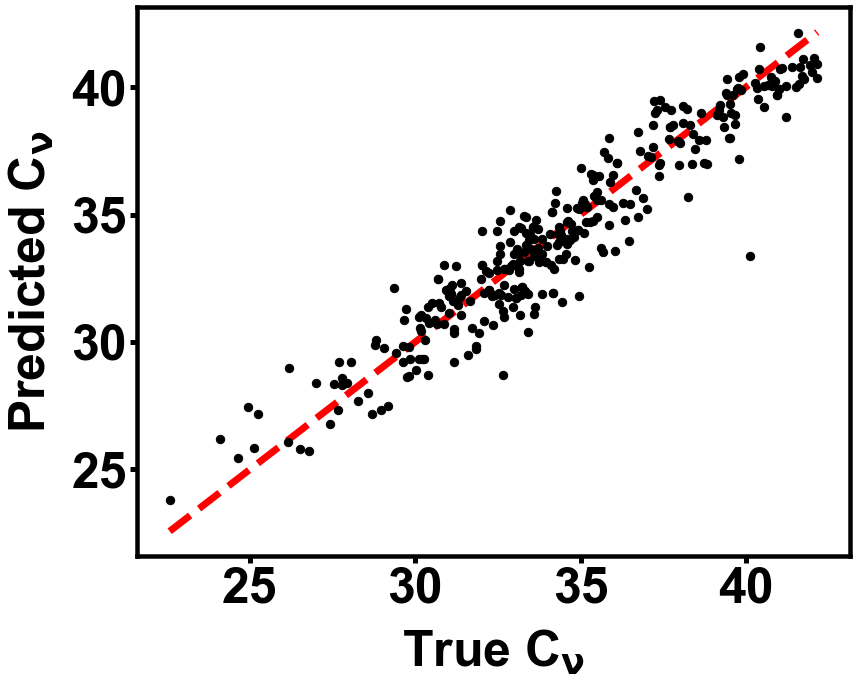

In [101]:
fig, ax = plt.subplots(figsize = (15*0.8, 12*0.8))
ax.tick_params(axis='both', which='major', labelsize=50, width=5, length=7)
plt.xlabel(r'True C$\mathbf{_\nu}$', fontsize=50, fontweight="bold", labelpad=15, fontname='Arial')
plt.ylabel(r'Predicted C$\mathbf{_\nu}$', fontsize=50, fontweight="bold", labelpad=15, fontname='Arial')
plt.yticks([25, 30, 35, 40, 45])
plt.xticks([25, 30, 35, 40, 45])

[i.set_linewidth(6) for i in ax.spines.values()]
lims=[np.min((np.min(y_pred), np.min(y_test))), np.max((np.max(y_pred), np.max(y_test)))]
plt.plot(lims, lims, '--',c='red', alpha=1, zorder=0, linewidth=7.0)

[i.set_linewidth(4.5) for i in ax.spines.values()]
plt.scatter(y_test, y_pred, s=70, color='black')

plt.tight_layout()
plt.savefig('xgboost_pred.jpeg', dpi=500, bbox_inches='tight')

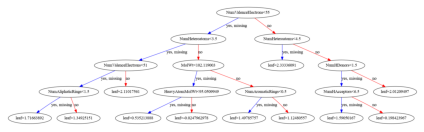

In [102]:
#fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(regr, num_trees=5)
#plt.savefig('tree_plot.jpeg', dpi=500)
plt.show()

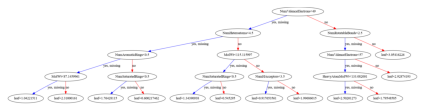

In [103]:
#fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(regr, num_trees=4)
#plt.savefig('tree_plot.jpeg', dpi=500)
plt.show()

In [54]:
y_pred[0], y_test[0]

(19.301239, 41.703)

In [55]:
y_pred[4], y_test[4]

(16.55706, 33.564)

In [57]:
10.8016605+7.99957895+0.5

19.30123945

In [53]:
X_test

,MolWt,HeavyAtomCount,HeavyAtomMolWt,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,NumRadicalElectrons,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumAromaticHeterocycles,NumSaturatedCarbocycles,NumSaturatedHeterocycles
1295,146.198,10,132.086,6,6,6,5,60,0,1,1,0,1,0,0,0,1,0
1225,140.190,10,128.094,4,3,4,5,56,0,0,0,0,0,0,0,0,0,0
14,88.114,6,80.050,3,4,4,2,36,0,0,0,0,0,0,0,0,0,0
1096,131.179,9,118.075,2,2,4,4,54,0,0,0,0,0,0,0,0,0,0
602,114.192,8,100.080,2,2,2,1,48,0,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,156.145,11,148.081,6,4,6,0,60,0,0,1,0,0,1,0,0,0,0
919,129.163,9,118.075,3,4,4,4,52,0,1,1,0,0,1,0,0,0,1
136,106.128,8,100.080,2,1,2,1,40,0,0,1,0,0,1,0,0,0,0
1016,129.203,9,114.083,2,2,2,1,54,0,1,1,0,1,0,0,0,1,0


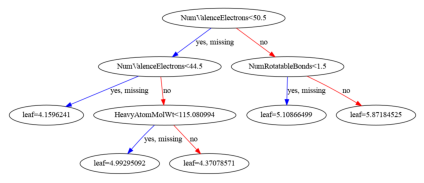

In [9]:
#fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(regr, num_trees=2)
#plt.savefig('tree_plot.jpeg', dpi=500)
plt.show()

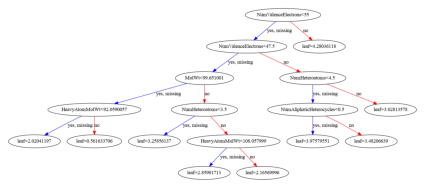

In [10]:
#fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(regr, num_trees=3)
plt.savefig('tree_plot.jpeg', dpi=500)
plt.show()

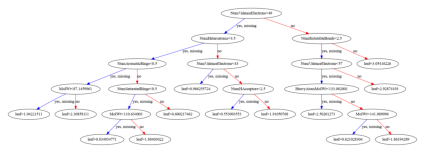

In [11]:
#fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(regr, num_trees=4)
#plt.savefig('tree_plot.jpeg', dpi=500)
plt.show()

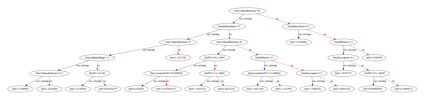

In [12]:
#fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(regr, num_trees=5)
#plt.savefig('tree_plot.jpeg', dpi=500)
plt.show()

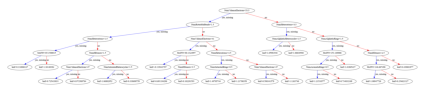

In [13]:
#fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(regr, num_trees=6)
#plt.savefig('tree_plot6.jpeg', dpi=500)
plt.show()

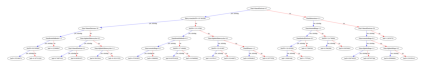

In [14]:
#fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(regr, num_trees=7)
#plt.savefig('tree_plot7.jpeg', dpi=500)
plt.show()

In [15]:
y_pred

array([41.042355, 40.493893, 25.34592 , 38.286835, 34.440823, 32.603878,
       32.4704  , 33.352432, 32.598816, 33.818554, 38.304848, 33.21249 ,
       37.952297, 35.35534 , 34.315403, 30.008284, 38.46504 , 37.263878,
       31.506563, 33.659477, 31.369238, 34.470936, 40.506165, 33.21249 ,
       27.786877, 31.196043, 32.741993, 37.208202, 31.890707, 34.373123,
       39.779682, 30.479998, 30.831745, 33.23435 , 31.757626, 29.389368,
       34.681812, 40.08669 , 40.034073, 34.03684 , 33.279873, 31.710102,
       33.428394, 33.805058, 41.997932, 40.288994, 38.00378 , 35.982178,
       33.918198, 38.087708, 34.433407, 33.42982 , 39.507675, 41.01582 ,
       30.623917, 29.068617, 37.70837 , 34.372334, 31.828215, 31.196043,
       29.770798, 32.32987 , 32.41674 , 27.944897, 34.785347, 24.702639,
       40.743523, 37.88718 , 28.883554, 32.762203, 32.32987 , 40.631603,
       37.67618 , 41.159897, 34.002533, 33.520695, 25.423767, 35.269432,
       27.795815, 34.65827 , 37.9432  , 31.600763, 